In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../data/diabetes.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Text(0.5, 0, 'BMI')

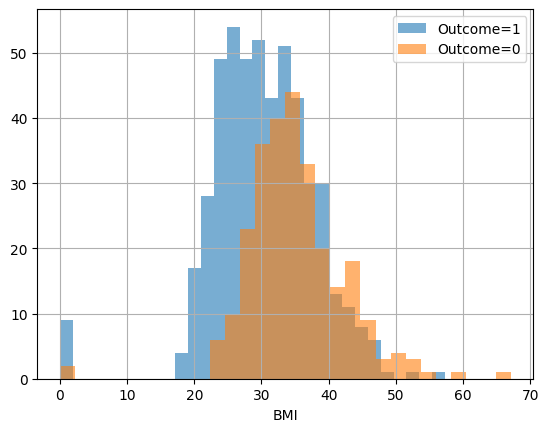

In [9]:
data[data['Outcome']==0]['BMI'].hist(bins=30,alpha=0.6,label='Outcome=1')
data[data['Outcome']==1]['BMI'].hist(bins=30,alpha=0.6,label='Outcome=0')
plt.legend()
plt.xlabel('BMI')

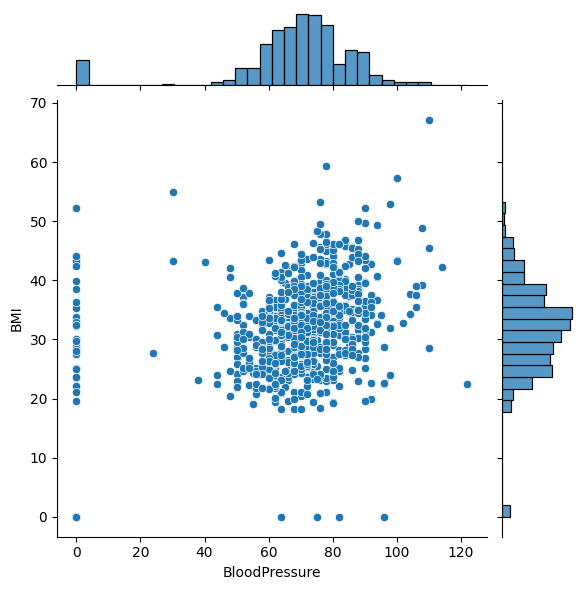

In [25]:
sns.jointplot(x='BloodPressure',y='BMI',data=data)


# Train test split

In [27]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

# Training Decision Tree Model

In [29]:
from sklearn.tree import DecisionTreeClassifier


In [30]:
dtree= DecisionTreeClassifier()


In [31]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier()

In [32]:
predictions = dtree.predict(X_test)


In [33]:
from sklearn.metrics import classification_report,confusion_matrix


In [34]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.71      0.77      0.74       143
           1       0.57      0.49      0.52        88

    accuracy                           0.66       231
   macro avg       0.64      0.63      0.63       231
weighted avg       0.65      0.66      0.66       231



In [35]:
print(confusion_matrix(y_test,predictions))


[[110  33]
 [ 45  43]]


# Training Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier


In [37]:
rfc = RandomForestClassifier()


In [38]:
rfc.fit(X_train,y_train)


RandomForestClassifier()

# Prediction and Evaluation of Random Forest

In [39]:
predictions = rfc.predict(X_test)


In [40]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.74      0.87      0.80       143
           1       0.70      0.51      0.59        88

    accuracy                           0.73       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.73      0.73      0.72       231



In [41]:
print(confusion_matrix(y_test,predictions))


[[124  19]
 [ 43  45]]
